In [3]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [4]:
pluto = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/Assignment One/NewYorkCity_StreetTreeCensus_2005_20250710.geojson"
)

In [5]:
pluto.columns

Index(['nta', 'horz_grate', 'sidw_crack', 'zipcode', 'soil_lvl', 'inf_outlet',
       'latitude', 'nta_name', 'state', 'inf_canopy', 'y_sp', 'wire_2_nd',
       'inf_guard', 'spc_common', 'horz_other', 'x_sp', 'inf_other',
       'tree_loc', 'wire_other', 'wire_prime', 'longitude', 'boro_ct',
       'zip_city', 'sidw_raise', 'spc_latin', 'vert_other', 'cen_year',
       'boroname', 'st_senate', 'wire_htap', 'status', 'vert_tgrd', 'cncldist',
       'inf_lights', 'vert_wall', 'st_assem', 'cb_num', 'pit_type',
       'trunk_dmg', 'address', 'horz_plant', 'inf_wires', 'borocode',
       'horz_blck', 'vert_pgrd', 'tree_dbh', 'inf_paving', 'inf_shoes',
       'geometry'],
      dtype='object')

In [6]:
list(pluto.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),

In [14]:
pluto.tree_dbh.value_counts()

tree_dbh
3      37459
4      37391
5      35362
6      33978
8      32598
       ...  
144        1
129        1
181        1
146        1
130        1
Name: count, Length: 146, dtype: int64

In [15]:
pluto.zipcode.value_counts()

zipcode
10312    22958
10314    15273
10309    11936
10306    11393
11234    10533
         ...  
11559       14
11251       14
10550       13
11359        7
10704        7
Name: count, Length: 188, dtype: int64

In [16]:
pluto.zip_city.value_counts()

zip_city
Brooklyn               141957
Staten Island           98823
Bronx                   58780
New York                49409
Flushing                22390
Jamaica                 21825
Fresh Meadows           10769
Ridgewood               10347
Whitestone              10346
Queens Village           9743
Bayside                  9538
Astoria                  7764
Forest Hills             7714
Little Neck              6991
Oakland Gardens          6864
South Ozone Park         6253
East Elmhurst            6039
Rosedale                 6002
Ozone Park               5827
Springfield Gardens      5734
Woodside                 5666
Middle Village           5151
Bellerose                4910
Glen Oaks                4699
Elmhurst                 4699
Howard Beach             4418
Far Rockaway             4336
Maspeth                  3934
Jackson Heights          3523
Rockaway Park            3510
Corona                   3366
Saint Albans             3322
Woodhaven                3202
C

In [17]:
pluto.spc_latin.value_counts()

spc_latin
PLATANUS ACERIFOLIA       89529
ACER PLATANOIDES          74721
PYRUS CALLERYANA          63593
GLEDITSIA TRIACANTHOS     52191
QUERCUS PALUSTRIS         43895
                          ...  
ULMUS THOMASII                1
QUERCUS VELUTINA              1
CEDRUS DEODARA                1
CHAMAECYPARIS PISIFERA        1
CARYA OVATA                   1
Name: count, Length: 169, dtype: int64

In [21]:
street_tree_distribution_summary = (
    pluto.groupby(["zipcode", "spc_latin"])
    .size()
    .reset_index(name="tree_count")
    .rename(columns={"spc_latin": "Tree_Type", "zipcode": "Zipcode"})
)

street_tree_distribution_summary

,Zipcode,Tree_Type,tree_count
0,0,ACER CAMPESTRE,15
1,0,ACER GINNALA,10
2,0,ACER PALMATUM,29
3,0,ACER PLATANOIDES,982
4,0,ACER PLATANOIDES CRIMSON KING,83
...,...,...,...
10502,11697,QUERCUS RUBRA,2
10503,11697,ROBINIA PSEUDOACACIA,1
10504,11697,TILIA AMERICANA,1
10505,11697,TILIA TOMENTOSA,5


In [ ]:
# Count number of trees per zip_city and rename the column to 'City'
street_tree_distribution_summary = (
    pluto.groupby("zip_city")
    .size()
    .reset_index(name="tree_count")
    .rename(columns={"zip_city": "City"})
)

# Display result
street_tree_distribution_summary

,City,tree_count
0,Arverne,754
1,Astoria,7764
2,Bayside,9538
3,Bellerose,4910
4,Breezy Point,48
5,Bronx,58780
6,Brooklyn,141957
7,Cambria Heights,3096
8,College Point,2418
9,Corona,3366


In [26]:
import pandas as pd

# Ensure ZIP codes are numeric
pluto["zipcode"] = pd.to_numeric(pluto["zipcode"], errors="coerce")

# Filter for Manhattan ZIP code range (10001–10282)
manhattan_trees = pluto[(pluto["zipcode"] >= 10001) & (pluto["zipcode"] <= 10282)]

# Reset index for cleanliness
manhattan_trees = manhattan_trees.reset_index(drop=True)

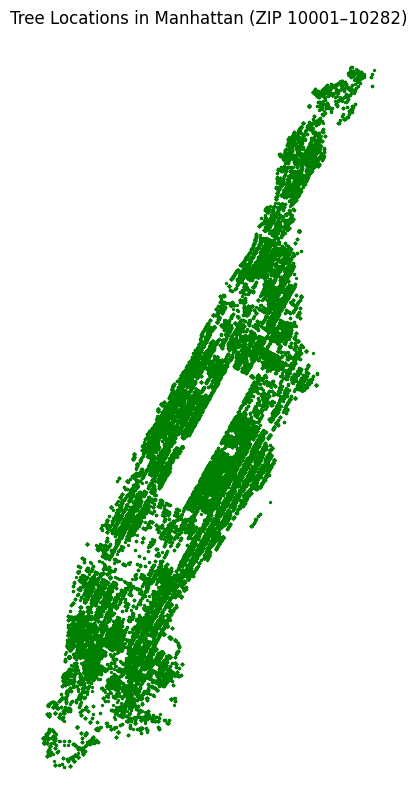

In [27]:
from shapely.geometry import Point
import geopandas as gpd

# Convert to GeoDataFrame from lat/lon
geometry = [
    Point(xy) for xy in zip(manhattan_trees["longitude"], manhattan_trees["latitude"])
]
manhattan_gdf = gpd.GeoDataFrame(manhattan_trees, geometry=geometry, crs="EPSG:4326")

# Plot the result
manhattan_gdf.plot(markersize=2, color="green", figsize=(10, 10))
plt.title("Tree Locations in Manhattan (ZIP 10001–10282)")
plt.axis("off")
plt.show()